In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow_probability.substrates import numpy as tfp
from cmdstanpy import CmdStanModel, set_cmdstan_path
import arviz as az
import pickle

In [2]:
with open("model_120.pkl", "rb") as f:
    data_dict = pickle.load(f)
fit120= data_dict['fit']
with open("model_180.pkl", "rb") as f:
    data_dict = pickle.load(f)
fit180 = data_dict['fit']

In [3]:
p180 = az.from_cmdstanpy(fit180)
p120 = az.from_cmdstanpy(fit120)

In [35]:
print(p180.posterior.eta.mean(dim=["chain","draw"]))
print(p180.posterior.eta.mean(dim=["chain","draw"]))

<xarray.DataArray 'eta' (eta_dim_0: 45)>
array([ 0.34701349, -0.07094654, -0.67841973, -0.81040742,  0.59347601,
       -0.9915526 , -1.12976689,  0.8239566 , -0.03086433, -0.09818153,
       -0.1729171 , -2.95949453, -0.63827052,  0.6720239 ,  0.46465315,
       -0.91359291, -0.14806396,  0.09814727,  0.7897454 , -0.63436709,
       -0.17959944, -0.92108998, -0.02885291, -1.03710736,  0.43572416,
       -0.15829892, -1.08600724,  0.39052098, -0.62738217, -0.70611504,
        0.69455039,  1.14210638, -1.26709855,  0.63969359,  0.46720845,
       -0.18956187, -0.80799953,  0.1129615 , -0.68851785,  0.70559683,
       -1.19336286, -0.36728907, -0.5327235 ,  0.59222361, -0.46750113])
Coordinates:
  * eta_dim_0  (eta_dim_0) int32 0 1 2 3 4 5 6 7 8 ... 37 38 39 40 41 42 43 44

In [4]:
az.summary(p120, var_names=["beta"], filter_vars="like")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.538,0.011,0.518,0.560,0.000,0.000,3936.0,3418.0,1.0
beta[1],0.049,0.011,0.029,0.070,0.000,0.000,3866.0,3727.0,1.0
beta[2],-0.128,0.015,-0.156,-0.101,0.000,0.000,4184.0,3209.0,1.0
beta[3],-0.266,0.041,-0.349,-0.195,0.001,0.000,4124.0,3256.0,1.0
beta[4],0.607,0.011,0.587,0.627,0.000,0.000,4014.0,4017.0,1.0
beta[5],0.135,0.041,0.057,0.208,0.001,0.000,4043.0,3119.0,1.0
sigma_beta,0.661,0.466,0.166,1.386,0.010,0.008,3837.0,1709.0,1.0


In [ ]:
# 0:mean_temperature,
# 1:mean_precipitation_sum
# 2:mean_precipitation_hours,
# 3:mean_windspeed_10m_max,
# 4:mean_radiation_sum,
# 5:count_highwind,
# 6:max_consecutive_highwind_days,
# 7:Densità,
# 8:Quota,
# 9:type_rural,
# 10:type_urban,

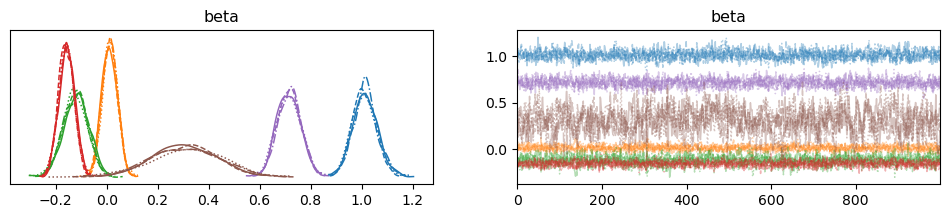

In [84]:
az.plot_trace(p180, var_names = ['beta'])
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
axes = az.plot_forest(p180,
                           kind='forestplot',
                           var_names=["^beta"],
                           filter_vars="regex",
                           combined=True,
                           figsize=(9, 7),
                           hdi_prob = .95)

In [ ]:
axes = az.plot_forest(p120,
                           kind='forestplot',
                           var_names=["beta"],
                           filter_vars="regex",
                           combined=True,
                           figsize=(9, 7),
                           hdi_prob = .95)

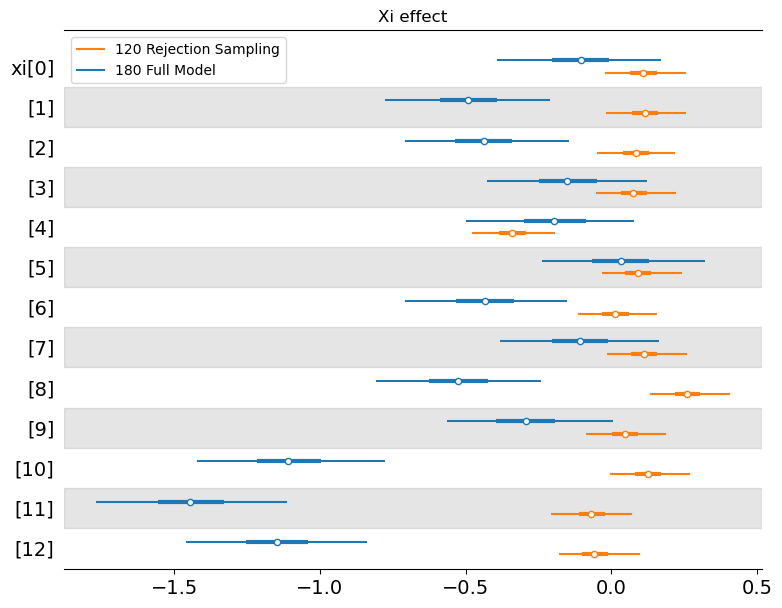

In [58]:
axes = az.plot_forest([fit180, fit120],
                           model_names = ["180 Full Model", "120 Rejection Sampling"],
                           kind='forestplot',
                           var_names=["xi"],
                           combined=True,
                           figsize=(9, 7),
                           hdi_prob = .95)
axes[0].set_title('Xi effect')
# plt.axvline(x=0, color='r', linestyle=':', linewidth=.5)
plt.show()